In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
dfevent = pd.read_csv(r"~\Downloads\telstra_recruiting_network\event_type.csv")
dflog = pd.read_csv(r"~\Downloads\telstra_recruiting_network\log_feature.csv")
dfresource = pd.read_csv(r"~\Downloads\telstra_recruiting_network\resource_type.csv")
dfsubmission = pd.read_csv(r"~\Downloads\telstra_recruiting_network\sample_submission.csv")
dfseverity = pd.read_csv(r"~\Downloads\telstra_recruiting_network\severity_type.csv")
dftest = pd.read_csv(r"~\Downloads\telstra_recruiting_network\test.csv")
dftrain = pd.read_csv(r"~\Downloads\telstra_recruiting_network\train.csv")

In [5]:
dg = dfevent.groupby('id').aggregate('count').reset_index()
dg.groupby('event_type').aggregate('count').head()

,id
event_type,
1,8015
2,8873
3,1375
4,222
5,34


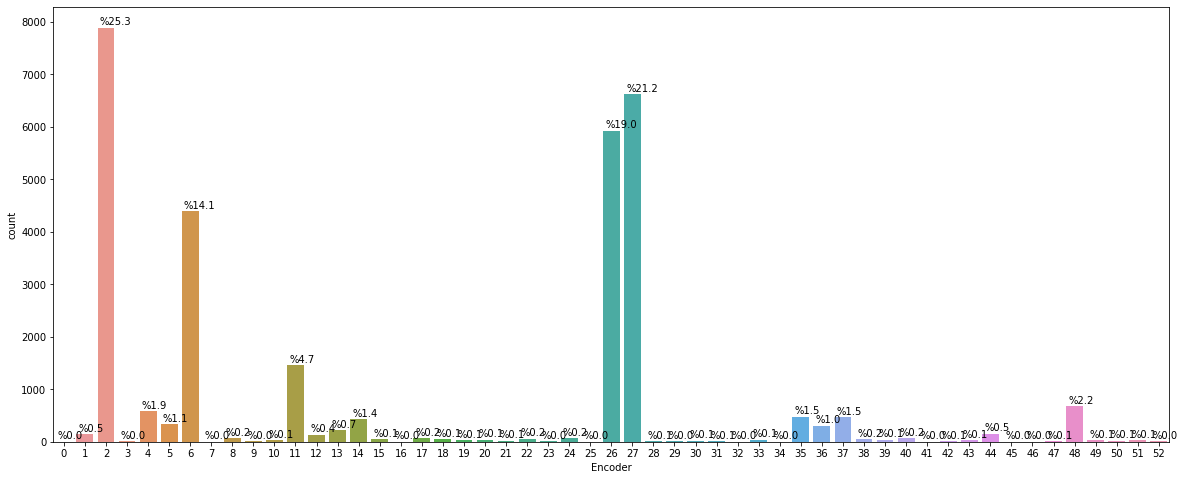

In [8]:
# Renombramos los categoricos solo para visualizar los nombres en la grafica temporalmente.
ev = preprocessing.LabelEncoder()
ev.fit(dfevent.event_type)
dfevent1= pd.DataFrame()
dfevent1['Encoder']=ev.transform(dfevent.event_type)

#En esta parte se crea la grafica en seaborn.
plt.figure(figsize=(20, 8))
ax=sns.countplot(x='Encoder',data=dfevent1)

#Este codigo es para poner el porcentaje que representa en la población total sobre el bin.
for p in ax.patches:
        ax.annotate('%{:.1f}'.format((p.get_height()/(len(dfevent1['Encoder'])))*100), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/categorical_variables.html
    

Lo que se hará a continuación es ver que event_types son más relevantes dado su repetición. Hay que recordar que existen en la base de dfevent: 31170 registros. Y nosotros por simplicidad y relevancia estadística se tomarán los event_type que más se repiten por el dilema de Pareto. 
- event_type: 11,35,34,15 y 20. Los anteriores event_type conforman alrededor del 84% de los datos. Por relevancia solo incluiremos esos únicamente.

In [9]:
dfevent.groupby('event_type').aggregate('count').sort_values(by=['id'],ascending=False).head()

,id
event_type,
event_type 11,7888
event_type 35,6615
event_type 34,5927
event_type 15,4395
event_type 20,1458


### Descriptivo del archivo "resource_type.csv"

De igual forma se observan que los Clientes llegan a tener al mismo tiempo 5 diferentes resource_type

In [10]:
dg = dfresource.groupby('id').aggregate('count').reset_index()
dg.groupby('resource_type').aggregate('count')

,id
resource_type,
1,16421
2,1814
3,257
4,44
5,16


In [11]:
dfresource.groupby('resource_type').aggregate('count').sort_values(by=['id'],ascending=False)

,id
resource_type,
resource_type 8,10268
resource_type 2,8918
resource_type 6,582
resource_type 7,498
resource_type 4,330
resource_type 9,190
resource_type 3,145
resource_type 10,73
resource_type 1,58


Por relevancia incluiremos el resource_type 8 y 2 que conforman el 91% de los datos.

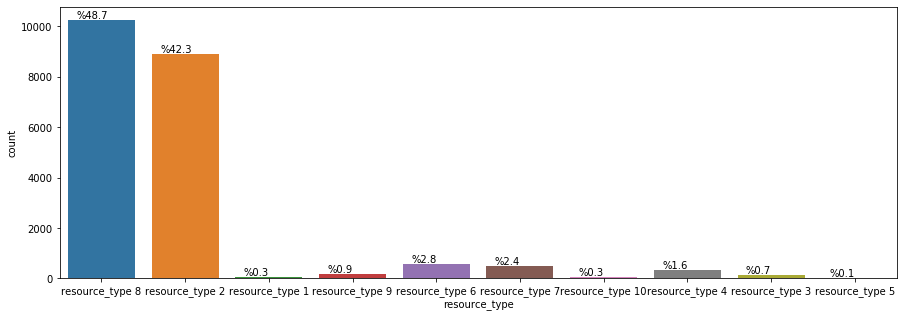

In [12]:
plt.figure(figsize=(15, 5))
ax=sns.countplot(x='resource_type',data=dfresource)
for p in ax.patches:
        ax.annotate('%{:.1f}'.format((p.get_height()/(len(dfresource['resource_type'])))*100), (p.get_x()+0.1, p.get_height()+50))

### Descriptivo del archivo "log_feature.csv"

El caso de este archivo es especial. El siguiente código muestra que cada 'feature #' tienen diferentes volúmenes. Se podrían agrupar sacando la media, pero en este caso no es posible hacerlo, ya que los volúmenes son características del feature que lo vuelven único.  

In [13]:
dflog.groupby(['log_feature', 'volume']).size()

log_feature  volume
feature 1    1         20
             2          1
feature 10   1         11
             2          2
             3          5
                       ..
feature 98   1          3
             2          3
             3          1
             5          1
feature 99   1          3
Length: 3972, dtype: int64

La mejor forma de proceder es extraer los principales features y luego también extraer los principales volúmenes por feature.

La siguiente línea de código muestra que los principales feature son los siguientes:'feature 312','feature 232','feature 82','feature 203','feature 313','feature 233','feature 307','feature 54','feature 170','feature 71','feature 315','feature 134','feature 80','feature 235','feature 193','feature 219','feature 68'

Y del volumen son:  1 al 7

In [14]:
dflog.log_feature.value_counts().head()

feature 312    5267
feature 232    4754
feature 82     3472
feature 203    2823
feature 313    2145
Name: log_feature, dtype: int64

In [15]:
dflog.volume.value_counts().head()

1    20713
2     9716
3     4488
4     3713
5     2207
Name: volume, dtype: int64

### Descriptivo del archivo "severity_type.csv"

Por último, severity se toman todos los campos.

In [16]:
dfseverity.severity_type.value_counts().head()

severity_type 2    8737
severity_type 1    8728
severity_type 4    1014
severity_type 5      65
severity_type 3       8
Name: severity_type, dtype: int64

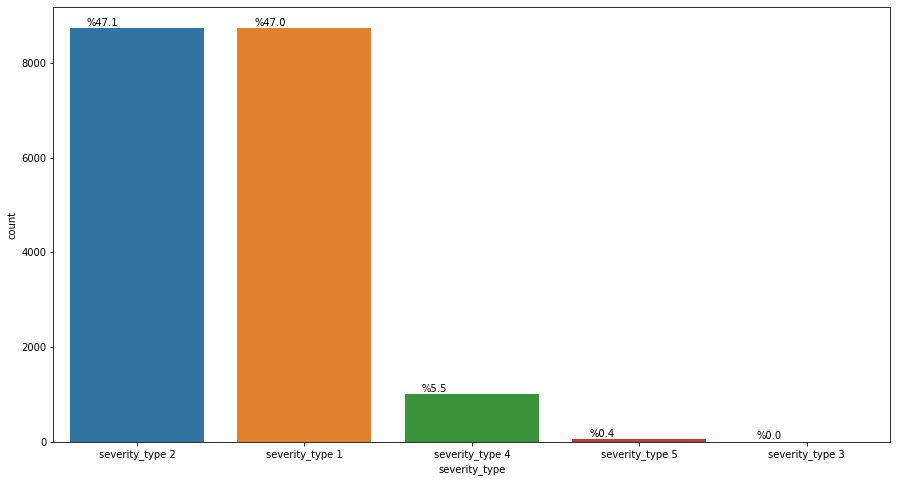

In [17]:
plt.figure(figsize=(15, 8))
ax=sns.countplot(x='severity_type',data=dfseverity)
for p in ax.patches:
        ax.annotate('%{:.1f}'.format((p.get_height()/(len(dfseverity['severity_type'])))*100), (p.get_x()+0.1, p.get_height()+50))

## 3. Data Preparation

Una vez entendido los datos, se toman las principales variables por relevancia y se meten en la función "get_dummies"

In [18]:
dfseverity=pd.get_dummies(dfseverity,prefix_sep='')
dfseverity=dfseverity.groupby(['id']).aggregate('sum').reset_index()
dfseverity.head()

,id,severity_typeseverity_type 1,severity_typeseverity_type 2,severity_typeseverity_type 3,severity_typeseverity_type 4,severity_typeseverity_type 5
0,1,1,0,0,0,0
1,2,0,1,0,0,0
2,3,1,0,0,0,0
3,4,0,0,0,1,0
4,5,0,1,0,0,0


In [19]:
principal=['resource_type 8','resource_type 2']
dfresource=dfresource.loc[dfresource.resource_type.isin(principal),:]
dfresource=pd.get_dummies(dfresource,prefix_sep='')
dfresource=dfresource.groupby(['id']).aggregate('sum').reset_index()
dfresource.head()

,id,resource_typeresource_type 2,resource_typeresource_type 8
0,1,0,1
1,2,1,0
2,3,0,1
3,4,1,0
4,5,1,0


In [20]:
principal=['event_type 11','event_type 35','event_type 34','event_type 15','event_type 20']
dfevent=dfevent.loc[dfevent.event_type.isin(principal),:]
dfevent=pd.get_dummies(dfevent,prefix_sep='')
dfevent=dfevent.groupby(['id']).aggregate('sum').reset_index()
dfevent.head()

,id,event_typeevent_type 11,event_typeevent_type 15,event_typeevent_type 20,event_typeevent_type 34,event_typeevent_type 35
0,1,1,0,0,0,0
1,2,0,0,0,1,1
2,3,1,0,0,0,0
3,5,0,0,0,1,1
4,6,0,0,0,1,0


In [21]:
principal=['feature 312','feature 232','feature 82','feature 203','feature 313','feature 233','feature 307','feature 54'
          ,'feature 170','feature 71','feature 315','feature 134','feature 80','feature 235','feature 193','feature 219','feature 68']
dflog=dflog.loc[dflog.log_feature.isin(principal),:]
dflog=dflog.loc[dflog.volume<7,:]
dflog.set_index(['id'],inplace=True)
dflogX=pd.get_dummies(
                    pd.DataFrame(
                            dflog[['log_feature', 'volume']].apply(lambda x: '_'.join(x.astype(str)), axis=1)
                    ,columns=[''],index=dflog.index)
            ,prefix_sep='').reset_index()
dflogX=dflogX.groupby(['id']).aggregate('sum').reset_index()

### Joins de los archivos con el archivo "train.csv" que contiene la variable objetivo.

El siguiente código muestra una forma reducida de realizar el join y posteriormente rellenar los missing values por ceros.

In [22]:
from functools import reduce

In [23]:
df = [dftrain,dfevent, dflogX, dfresource,dfseverity]
lf = reduce(lambda left, right: pd.merge(left,right,on='id',how='left'), df)
lf.fillna(0,inplace=True)

También se realizó el anterior código con python desde Dataiku y su respectivo Join.

In [24]:
lf.head()

,id,location,fault_severity,event_typeevent_type 11,event_typeevent_type 15,event_typeevent_type 20,event_typeevent_type 34,event_typeevent_type 35,feature 134_1,feature 134_2,...,feature 82_4,feature 82_5,feature 82_6,resource_typeresource_type 2,resource_typeresource_type 8,severity_typeseverity_type 1,severity_typeseverity_type 2,severity_typeseverity_type 3,severity_typeseverity_type 4,severity_typeseverity_type 5
0,14121,location 118,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
1,9320,location 91,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
2,14394,location 152,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
3,8218,location 931,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0
4,14804,location 120,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0


In [25]:
lf.corr().loc[abs(lf.corr()['fault_severity']>=0.05),'fault_severity']

fault_severity                  1.000000
event_typeevent_type 11         0.171891
event_typeevent_type 15         0.341506
feature 170_1                   0.064567
feature 170_2                   0.050022
feature 170_6                   0.054431
feature 193_2                   0.072341
feature 193_3                   0.063991
feature 193_6                   0.051559
feature 203_1                   0.074956
feature 203_2                   0.091039
feature 203_3                   0.067357
feature 203_4                   0.172122
feature 203_5                   0.083723
feature 203_6                   0.139007
feature 54_1                    0.058121
feature 68_2                    0.056503
feature 71_1                    0.083712
feature 71_2                    0.071107
feature 71_3                    0.057623
feature 80_1                    0.080733
feature 80_2                    0.064768
feature 80_4                    0.057802
feature 82_4                    0.052751
feature 82_6    

In [26]:
lf.fault_severity.dtype

dtype('int64')

In [27]:
lf2=lf.astype('category')

In [28]:
lf2.fault_severity.dtype

CategoricalDtype(categories=[0, 1, 2], ordered=False)

In [29]:
pd.crosstab(index=lf2["fault_severity"], 
                          columns=lf2["event_typeevent_type 15"])

event_typeevent_type 15,0.0,1.0
fault_severity,,
0,4033,751
1,1412,459
2,212,514


In [30]:
import scipy.stats

In [31]:
black = [9,10,12,11,8,10]
red   = [6,5,14,15,11,9]
 
chi2, p = scipy.stats.chisquare( black )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: 1.0
p-value: 0.9625657732472964


In [146]:
house = [ [ 0,10 ], [10, 0 ]]
chi2, p, ddof, expected = scipy.stats.chi2_contingency( house )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 16.2
p-value: 5.699411623331848e-05
Degrees of Freedom: 1

[[5. 5.]
 [5. 5.]]


In [140]:
house = [ [ 1412,459 ], [4033, 751 ],[212,514] ]
chi2, p, ddof, expected = scipy.stats.chi2_contingency( house )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 1070.983092881021
p-value: 2.7477440432559488e-233
Degrees of Freedom: 2

[[1433.98550332  437.01449668]
 [3666.58826717 1117.41173283]
 [ 556.42622951  169.57377049]]


In [32]:
chi2, p, ddof, expected = scipy.stats.chi2_contingency(pd.crosstab(index=lf2["fault_severity"], 
                                            columns=lf2["event_typeevent_type 15"]))
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 1070.983092881021
p-value: 2.7477440432559488e-233
[[3666.58826717 1117.41173283]
 [1433.98550332  437.01449668]
 [ 556.42622951  169.57377049]]


In [45]:
columns = lf2.drop(['fault_severity','id','location'], axis=1).columns

Index(['id', 'location', 'event_typeevent_type 11', 'event_typeevent_type 15',
       'event_typeevent_type 20', 'event_typeevent_type 34',
       'event_typeevent_type 35', 'feature 134_1', 'feature 134_2',
       'feature 134_3',
       ...
       'feature 82_4', 'feature 82_5', 'feature 82_6',
       'resource_typeresource_type 2', 'resource_typeresource_type 8',
       'severity_typeseverity_type 1', 'severity_typeseverity_type 2',
       'severity_typeseverity_type 3', 'severity_typeseverity_type 4',
       'severity_typeseverity_type 5'],
      dtype='object', length=116)

In [63]:
col = list(lf2.drop(['fault_severity','id','location'], axis=1).columns)
crostable = list(map(lambda x: pd.crosstab(index=lf2["fault_severity"],columns=lf2[x]), col))

In [97]:
chi2 = list(range(0,len(crostable)))
p = list(range(0,len(crostable)))
ddof = list(range(0,len(crostable)))
expected = list(range(0,len(crostable)))
#count = range(0,len(crostable))
#chi2, p, ddof, expected = list(map(lambda x: scipy.stats.chi2_contingency(crostable[x]),count))

for i in range(0,len(crostable)):
    chi2[i], p[i], ddof[i], expected[i] = scipy.stats.chi2_contingency(crostable[i])

In [101]:
print(p)

[7.796744887579593e-53, 2.7477440432559488e-233, 0.00030536033810751444, 4.3666313445137426e-148, 1.2826497453300063e-190, 0.0013467653690790089, 0.4539394004085916, 0.726437026654394, 0.7408694720280844, 0.5810036123708469, 0.5810036123708469, 1.5046032756642823e-38, 3.113528577168857e-24, 6.257439164224634e-12, 0.015152744524051916, 0.027487576964936127, 4.3044611118125495e-06, 1.5513348364233458e-05, 2.787679297264131e-12, 7.473255738375491e-13, 1.6873622044030937e-06, 0.005670367896952672, 2.9663678483889037e-09, 4.0798299021335956e-39, 9.722845629332993e-48, 7.140385592036737e-18, 1.0552392744587825e-66, 3.507897382351091e-13, 1.0397936409560937e-38, 0.021696702224192194, 0.5304643441815424, 0.726437026654394, 0.5852782713683389, 0.7622639716330826, 0.44281294135361426, 1.0111993458224167e-18, 6.962635194651785e-12, 1.431692466548647e-10, 4.675128370605186e-09, 4.890715129062966e-07, 4.066288518575742e-09, 3.468555132648425e-08, 1.817652448109846e-07, 1.6606045311283042e-05, 1.813

<a href="https://imgbb.com/"><img src="https://i.ibb.co/jwxSVt3/join-dataiq.png" alt="join-dataiq" border="0"></a>

## 4. Modeling

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

In [46]:
#X = t.drop(columns=['fault_severity'])
#y = t['fault_severity']

X = lf.drop(columns=['fault_severity','id','location'])
y = lf['fault_severity']

# tomo una muestra estratificada del 20%

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

In [47]:
X_train = pd.DataFrame(X_train,columns=list(X.columns))
X_test  = pd.DataFrame(X_test,columns=list(X.columns))

Exploramos el número de muestras que tenemos por cada categoría de la variable objetivo:

In [48]:
lf.groupby('fault_severity').count()[['id']]

,id
fault_severity,
0,4784
1,1871
2,726


Desde Dataiku

<a href="https://imgbb.com/"><img src="https://i.ibb.co/30djrRj/Ydatai1.png" alt="Ydatai1" border="0"></a>

Vemos que para balancear el dataset podemos darle un peso a cada categoría de manera que queden parejas:
    
faul_severity '0': 4784/4784= 1 <br>
faul_severity '1':4781/1871 = 2.55 <br>
faul_severity '2':4781/726 = 6.58 <br>


C0 = 1 <br>
C1 = 2.55 <br>
C2 = 6.58 <br>

Seteamos los parámetros para varios modelos: <br>
en el caso de class_weight pondremos los coeficientes que encontramos y unos mas conservadores en el peso de clase

Parámetros de la Logit:
- solver : Algortimo utilizado para minimizar la loss-function
- 'multi_class': se elige 'multinomial' por ser un problema con target multicategórico
- class_weight: Se dan los pesos que se les quiere otorgar a las clases [{0: 1, 1: 2.55,2:6.58},{0: 1, 1: 1.5,2:3.5}]

Parámetros del XGBoost:
- 'objective': se elige 'multi:softmax' por ser un problema multicategórico
- 'max_depth': máximo número de descendencias de los árboles
- 'eval_metric': métrica de evaluación, log-loss multicategórica
- 'C': Parámetro de regularización para outliers
- Class weigth: seteado igual que antes

Parámetros del SVC:
- 'Gamma': Parámetro de influencia radial de los puntos 
- 'C': Parámetro de regularización.

Parámetros del RF:
- 'n_estimators' : número de arboles
- 'criterio' : criterio de corte
- max features: máximo número de variables por árbol
- max depth: máximo número de descendencias para prevenir overfitting


In [49]:
paramsLogit   = {'solver':['newton-cg', 'lbfgs','sag', 'saga'],'multi_class':['multinomial'],'class_weight':[{0: 1, 1: 2.55,2:6.58},{0: 1, 1: 1.5,2:3.5}]}
paramsXGBoost = {'objective':['multi:softmax'],'max_depth':[4,5,6,7],'eval_metric' : ['mlogloss'],'C':[0.1,.5,1,5],'class_weight':[{0: 1, 1: 2.55,2:6.58},{0: 1, 1: 1.5,2:3.5}]}
paramsRF      = {'n_estimators':[60,80,100,120],'criterion':['gini','entropy'],'max_features':['sqrt','log2'],'max_depth':[5,6,7],'class_weight':[{0: 1, 1: 2.55,2:6.58},{0: 1, 1: 1.5,2:3.5}]}

- log_loss: cuanto menor sea la puntuación, mejor será el modelo.

- neg_log_loss:la puntuación es negativa: cuanto mayor sea la puntuación, mejor será el modelo.

 -cv: Quiere decir Cross-Validation.

In [50]:
Logit   = LogisticRegression()
XGBoost = XGBClassifier()
RFC     = RandomForestClassifier()

GS_Logit   = GridSearchCV(Logit,   n_jobs=-1, cv=5,  scoring='neg_log_loss', param_grid=paramsLogit,verbose=3)
GS_XGBoost = GridSearchCV(XGBoost, n_jobs=-1, cv=5,  scoring='neg_log_loss', param_grid=paramsXGBoost,verbose=3)
GS_RFC     = GridSearchCV(RFC,     n_jobs=-1, cv=5,  scoring='neg_log_loss', param_grid=paramsRF,verbose=3)

Se realiza una Estandarización.

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [52]:
GS_Logit.fit(X_train_s,y_train)
GS_XGBoost.fit(X_train,y_train)
GS_RFC.fit(X_train,y_train)

Best_Logit = GS_Logit.best_estimator_
Best_XGBoost = GS_XGBoost.best_estimator_
Best_RFC = GS_RFC.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   38.2s finished
D:\Users\zvelazquez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 12.5min finished


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.2min finished


In [53]:
Best_Logit.fit(X_train_s,y_train)
Best_XGBoost.fit(X_train,y_train)
Best_RFC.fit(X_train,y_train)

D:\Users\zvelazquez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1.5, 2: 3.5},
            criterion='gini', max_depth=7, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Se realiza la predicción del mejor modelo encontrado de acuerdo al parametro de neg_log_loss

In [54]:
y_pred_Logit = Best_Logit.predict(X_test_s)
y_pred_XGBoost = Best_XGBoost.predict(X_test)
y_pred_RFC = Best_RFC.predict(X_test)

D:\Users\zvelazquez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
y_prob_Logit = Best_Logit.predict_proba(X_test_s)
y_prob_XGBoost = Best_XGBoost.predict_proba(X_test)
y_prob_RFC = Best_RFC.predict_proba(X_test)

## 5. Evaluation

Se obtiene que el mejor modelo es  **XGBoost con un 0.69465 de accuricy y un 0.666 de Log loss.**

In [56]:
accur_Logit = accuracy_score(y_test,y_pred_Logit)
accur_XGBoost = accuracy_score(y_test,y_pred_XGBoost)
accur_RFC = accuracy_score(y_test,y_pred_RFC)

dic_accur = {'Logit':accur_Logit,'XGBoost':accur_XGBoost,'RFC':accur_RFC}

print(dic_accur)

{'Logit': 0.6452268111035884, 'XGBoost': 0.6946513202437373, 'RFC': 0.6479350033852403}


In [57]:
#log los XGBoost
log_loss(y_test,y_prob_XGBoost)

0.6665892149577107

Por parte de la herramienta Dataiku, se obtuvo los siguientes resultados con los parametros por Default.

<a href="https://ibb.co/v3VtKDk"><img src="https://i.ibb.co/PcFSftg/dataig.png" alt="dataig" border="0"></a>

## 6. Evaluation

In [58]:
confusion_matrix(y_test,y_pred_Logit)

array([[729,  96, 132],
       [193, 127,  55],
       [ 37,  11,  97]], dtype=int64)

In [59]:
confusion_matrix(y_test,y_pred_XGBoost)

array([[898,  43,  16],
       [258, 103,  14],
       [107,  13,  25]], dtype=int64)

In [60]:
confusion_matrix(y_test,y_pred_RFC)

array([[767,  45, 145],
       [221,  90,  64],
       [ 39,   6, 100]], dtype=int64)

- Conclusiones:
<br> Existen veces que de acuerdo a la función de mejor desempeño (en este caso log loss) no es el único KPI a considerar para poner en productivo un modelo. Es importante también evaluar cual modelo se generaría menos perdida monetaria o de insatisfacción por parte de la unidad de negocio como en este caso el cliente que es Telstra. Por lo que existen otros indicares también podrían ser la estabilidad del modelo a través del tiempo o la interpretabilidad. <br>

<br>También una cosa a resaltar cual de los modelos prefieres dado la menor cantidad de Falsos Positivos o Falsos Negativos según el modelo. Normalmente se defino eso con la unidad de Negocio.<br>


#### Se crea el archivo para el testing y se manda a Kaggle para el Final Score

In [66]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 2 columns):
id          11171 non-null int64
location    11171 non-null object
dtypes: int64(1), object(1)
memory usage: 174.6+ KB


In [74]:
df1 = [dftest,dfevent, dflogX, dfresource,dfseverity]
lf1 = reduce(lambda left, right: pd.merge(left,right,on='id',how='left'), df1)

In [79]:
lf1.fillna(0,inplace=True)

In [91]:
X = lf1.drop(columns=['id','location'])

In [146]:
y_prob_XGBoost = Best_XGBoost.predict_proba(X)
y_pred_XGBoost = Best_XGBoost.predict(X)

D:\Users\zvelazquez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [157]:
pred_df=pd.DataFrame(Best_XGBoost.predict_proba(X),columns=['predict_0', 'predict_1', 'predict_2'])

In [159]:
submission=pd.concat([lf1[['id']],pred_df],axis=1)

Se crea el archivo pred2 para el scoring de Kaggle

In [161]:
submission[['id','predict_0','predict_1','predict_2']].to_csv(r"~\Downloads\pred2.csv",index=False)

Scoring

<a href="https://imgbb.com/"><img src="https://i.ibb.co/x7my7pq/kaggle.png" alt="kaggle" border="0"></a>